<a href="https://colab.research.google.com/github/rickiepark/the-ml-book/blob/main/Ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장 문제 해결

## 7.1 커널 회귀

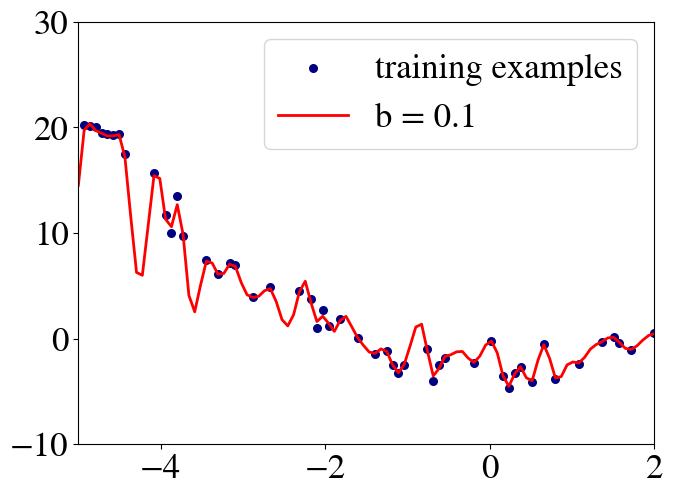

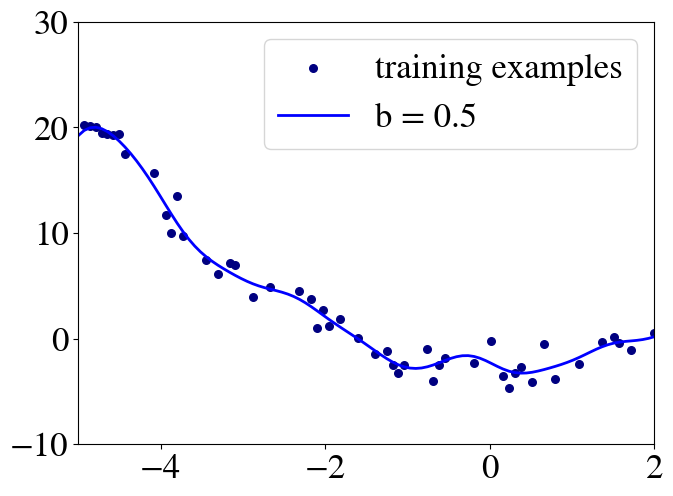

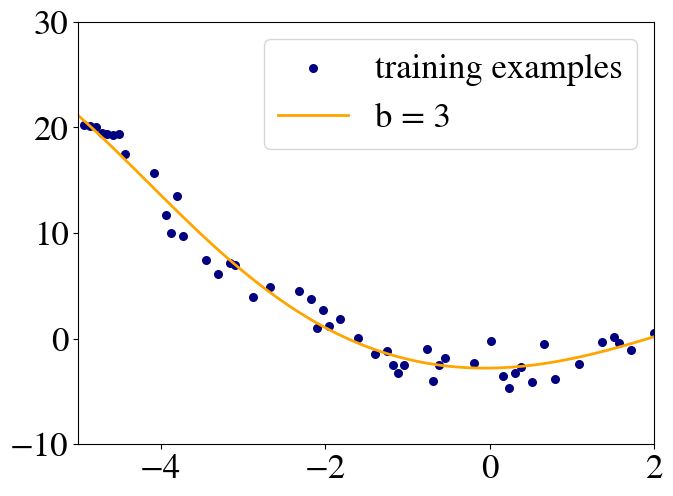

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 25})

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * (x)


# generate points used to plot
x_plot = np.linspace(-5, 2, 100)

# generate points and keep a subset of them
x = np.linspace(-5, 2, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:50])
noize = [(-5 + np.random.random()*5) for i in range(len(x))]
y = f(x) + noize

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['red', 'blue', 'orange']
lw = 2

def kernel(x1, x2, b = 2):
    z = (x1 - x2) / b
    return (1/math.sqrt(2 * 3.14)) * np.exp(-z**2/2)

fit = ["fit", "small overfit", "big overfit"]
for count, degree in enumerate([0.1, 0.5, 3]):
    plt.figure(count)
    axes = plt.gca()
    axes.set_xlim([-5,2])
    axes.set_ylim([-10,30])
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training examples")
    model = KernelRidge(alpha=0.01, kernel=kernel, kernel_params = {'b':degree})
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="b = " + str(degree))

    plt.legend(loc='upper right')
    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)

plt.show()

/tmp/ipython-input-2-3514188893.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 200).T


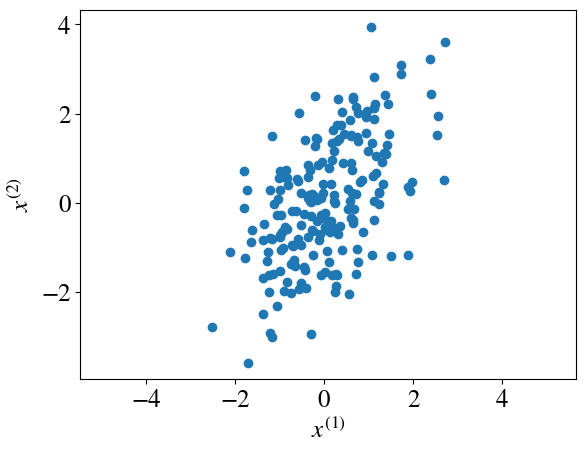

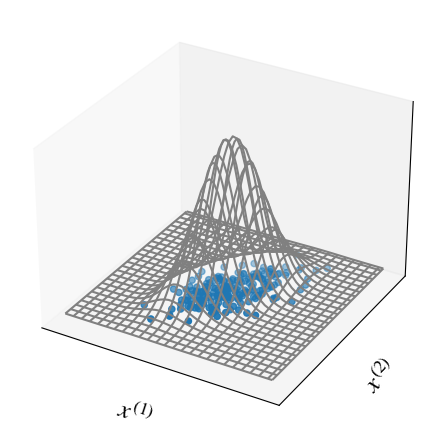

In [2]:
import numpy as np
import matplotlib

from scipy.stats import multivariate_normal
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

import matplotlib.pyplot as plt

mean = [0, 0]
cov = [[1, 4/5], [3/4, 2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 200).T
fig = plt.figure(1)
plt.plot(x, y, 'o')
plt.axis('equal')
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.show()

fig.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.02, hspace = 0, wspace = 0)

fig1 = plt.figure(2)
ax = fig1.add_subplot(111, projection='3d')

x1, y1 = np.mgrid[-5:5:.2, -5:5:.2]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1; pos[:, :, 1] = y1
rv = multivariate_normal(mean, cov)
ax.plot_wireframe(x1, y1, rv.pdf(pos), rstride=2, cstride=2, color='gray')

z = [0] * len(x)
ax.scatter(x, y, z)

ax.set_xlabel('$x^{(1)}$')
ax.set_ylabel('$x^{(2)}$')
ax.set_zlabel('pdf');
ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])

fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.9, left = 0.08, hspace = 0, wspace = 0)

plt.show()